In [1]:
%matplotlib inline
import matplotlib.cm as cm
import random

# Import tree stuff:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Import other models:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Bagging:
from sklearn.ensemble import BaggingClassifier

# Searching hyperparameters and cross-validating
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

import pickle

In [2]:
with open("x_liv.pkl", 'rb') as picklefile: 
    x_liv = pickle.load(picklefile)

with open("y_liv.pkl", 'rb') as picklefile: 
    y_liv = pickle.load(picklefile)

In [3]:
with open("y_train_liv.pkl", 'rb') as picklefile: 
    y_train_liv = pickle.load(picklefile)

with open("y_test_liv.pkl", 'rb') as picklefile: 
    y_test_liv = pickle.load(picklefile)

with open("x_train_liv.pkl", 'rb') as picklefile: 
    x_train_liv = pickle.load(picklefile)

with open("x_test_liv.pkl", 'rb') as picklefile: 
    x_test_liv = pickle.load(picklefile)

with open("x_train_scaled_liv.pkl", 'rb') as picklefile: 
    x_train_scaled_liv = pickle.load(picklefile)

with open("x_test_scaled_liv.pkl", 'rb') as picklefile: 
    x_test_scaled_liv = pickle.load(picklefile)
    
with open("x_scaled_liv.pkl", 'rb') as picklefile: 
    x_scaled_liv = pickle.load(picklefile)

with open("patientdataICD9_liv.pkl", 'rb') as picklefile: 
    patientdataICD9_liv = pickle.load(picklefile)

In [4]:
x_train = x_train_liv
y_train = y_train_liv
x_test = x_test_liv
y_test = y_test_liv
x = x_liv
y = y_liv

In [5]:
y = y.str.replace('>30','NO')
y_test = y_test.str.replace('>30','NO')
y_train = y_train.str.replace('>30','NO')

In [6]:
y.unique()

array(['NO', '<30'], dtype=object)

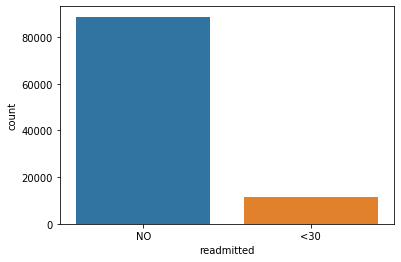

In [7]:
sns.countplot(y)

In [8]:
y.value_counts()

NO     88757
<30    11357
Name: readmitted, dtype: int64

In [9]:
# pulling these in from pickle now

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [10]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

#linearsvc = LinearSVC()
# Do the test 10 times with a LinearSVC and get the average score
#quick_test_afew_times(linearsvc, X, y1)

#### Decision tree and random forest:

In [11]:
decisiontree = DecisionTreeClassifier(max_depth=2)
quick_test_afew_times(decisiontree, x, y)

# using x train and x test with x that had been scaled before test-train split:
# 0.5664330167048804

0.886026302646912

In [12]:
randomforest = RandomForestClassifier()
quick_test_afew_times(randomforest, x, y)

# using x train and x test with x that had been scaled before test-train split:
# 0.5488994431706519

0.8863392708506742

In [13]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.887
              precision    recall  f1-score   support

         <30       0.56      0.01      0.01      2839
          NO       0.89      1.00      0.94     22190

    accuracy                           0.89     25029
   macro avg       0.72      0.50      0.48     25029
weighted avg       0.85      0.89      0.83     25029



#### SMOTE:

In [14]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

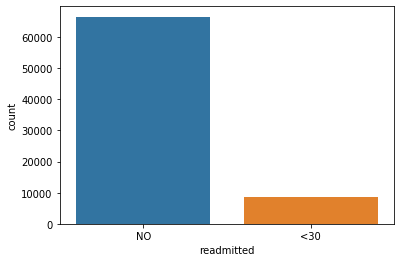

In [15]:
sns.countplot(y_train);

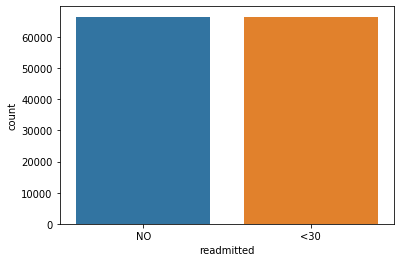

In [16]:
sns.countplot(y_train_smote);

In [17]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train_smote, y_train_smote)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.887
              precision    recall  f1-score   support

         <30       0.57      0.01      0.02      2839
          NO       0.89      1.00      0.94     22190

    accuracy                           0.89     25029
   macro avg       0.73      0.50      0.48     25029
weighted avg       0.85      0.89      0.84     25029



In [18]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=10)
randomforest.fit(x_train_smote, y_train_smote)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.887
              precision    recall  f1-score   support

         <30       0.65      0.00      0.01      2839
          NO       0.89      1.00      0.94     22190

    accuracy                           0.89     25029
   macro avg       0.77      0.50      0.47     25029
weighted avg       0.86      0.89      0.83     25029



#### Undersampling:

In [19]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

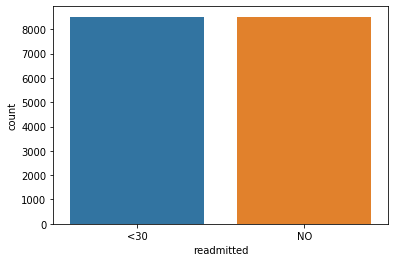

In [20]:
sns.countplot(y_train_undersampled);

In [21]:
randomforest = RandomForestClassifier(n_estimators=200)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.616
              precision    recall  f1-score   support

         <30       0.17      0.62      0.27      2839
          NO       0.93      0.62      0.74     22190

    accuracy                           0.62     25029
   macro avg       0.55      0.62      0.50     25029
weighted avg       0.84      0.62      0.69     25029



In [22]:
randomforest = RandomForestClassifier(n_estimators=200)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.616
              precision    recall  f1-score   support

         <30       0.17      0.63      0.27      2839
          NO       0.93      0.61      0.74     22190

    accuracy                           0.62     25029
   macro avg       0.55      0.62      0.51     25029
weighted avg       0.84      0.62      0.69     25029



In [23]:
class_weights = {}
class_weights['NO'] = 1
class_weights['<30'] = 0.15
randomforest = RandomForestClassifier(n_estimators=200, class_weight = class_weights, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.857
              precision    recall  f1-score   support

         <30       0.28      0.16      0.21      2839
          NO       0.90      0.95      0.92     22190

    accuracy                           0.86     25029
   macro avg       0.59      0.56      0.56     25029
weighted avg       0.83      0.86      0.84     25029

[[  466  2373]
 [ 1197 20993]]


model.train(x_train, y_train)
y_pred = model.predict(x_test)
metrics.confusion_matrix(y_test, pred)

thresholding:
y_pred_proba = model.predict_proba(x_test)
y_pred = y_pred_proba >= 0.25 (this is the value to play around with)
metrics.confusion_matrix(y_test, y_pred)
plot prec and recall by threshold
metrics.precision_recall_curve

underfit = adding complexity helps
overfit = adding complexity hurts

In [24]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.625
              precision    recall  f1-score   support

         <30       0.18      0.63      0.28      2839
          NO       0.93      0.62      0.75     22190

    accuracy                           0.63     25029
   macro avg       0.55      0.63      0.51     25029
weighted avg       0.84      0.63      0.69     25029



In [25]:
model = randomforest
y_pred_proba = model.predict_proba(x_test)
y_pred = y_pred_proba >= 0.25 #(this is the value to play around with)
#y_pred
#print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
#print(metrics.classification_report(y_test, y_pred))
#metrics.confusion_matrix(y_test, y_pred)
#plot prec and recall by threshold

In [26]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=20)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.627
              precision    recall  f1-score   support

         <30       0.18      0.63      0.28      2839
          NO       0.93      0.63      0.75     22190

    accuracy                           0.63     25029
   macro avg       0.55      0.63      0.51     25029
weighted avg       0.84      0.63      0.69     25029



In [27]:
randomforest = RandomForestClassifier(n_estimators=1000, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.627
              precision    recall  f1-score   support

         <30       0.18      0.63      0.28      2839
          NO       0.93      0.63      0.75     22190

    accuracy                           0.63     25029
   macro avg       0.55      0.63      0.51     25029
weighted avg       0.84      0.63      0.70     25029



In [28]:
# tune random forest hyperparameters
# try grid-search CV
# try ensembling with the RBF

#### Extra-random trees:

In [29]:
extraforest = ExtraTreesClassifier(n_estimators=200, min_samples_split=10)
extraforest.fit(x_train_undersampled, y_train_undersampled)
extraforest.score(x_test, y_test)
y_pred = extraforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.612
              precision    recall  f1-score   support

         <30       0.17      0.62      0.27      2839
          NO       0.93      0.61      0.74     22190

    accuracy                           0.61     25029
   macro avg       0.55      0.62      0.50     25029
weighted avg       0.84      0.61      0.68     25029



In [30]:
extraforest = ExtraTreesClassifier(n_estimators=2000)
extraforest.fit(x_train_undersampled, y_train_undersampled)
extraforest.score(x_test, y_test)
y_pred = extraforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.606
              precision    recall  f1-score   support

         <30       0.17      0.62      0.26      2839
          NO       0.93      0.60      0.73     22190

    accuracy                           0.61     25029
   macro avg       0.55      0.61      0.50     25029
weighted avg       0.84      0.61      0.68     25029



In [31]:
for n_estimator in range(100, 2000, 100):
    extraforest = ExtraTreesClassifier(n_estimators=n_estimator)
    extraforest.fit(x_train_undersampled, y_train_undersampled)
    extraforest.score(x_test, y_test)
    y_pred = extraforest.predict(x_test)
    print("Number of estimators: %.3f"% n_estimator)
    print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))

Number of estimators: 100.000
Accuracy: 0.591
              precision    recall  f1-score   support

         <30       0.16      0.63      0.26      2839
          NO       0.93      0.59      0.72     22190

    accuracy                           0.59     25029
   macro avg       0.54      0.61      0.49     25029
weighted avg       0.84      0.59      0.67     25029

Number of estimators: 200.000
Accuracy: 0.598
              precision    recall  f1-score   support

         <30       0.16      0.62      0.26      2839
          NO       0.92      0.59      0.72     22190

    accuracy                           0.60     25029
   macro avg       0.54      0.61      0.49     25029
weighted avg       0.84      0.60      0.67     25029

Number of estimators: 300.000
Accuracy: 0.605
              precision    recall  f1-score   support

         <30       0.17      0.63      0.26      2839
          NO       0.93      0.60      0.73     22190

    accuracy                           0.60 

#### Boosted trees:

In [32]:
# boosted no resampling

boostforest = AdaBoostClassifier(n_estimators=200)
boostforest.fit(x_train, y_train)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.886
              precision    recall  f1-score   support

         <30       0.43      0.02      0.03      2839
          NO       0.89      1.00      0.94     22190

    accuracy                           0.89     25029
   macro avg       0.66      0.51      0.48     25029
weighted avg       0.84      0.89      0.84     25029



In [33]:
# boosted undersampled

boostforest = AdaBoostClassifier(n_estimators=200)
boostforest.fit(x_train_undersampled, y_train_undersampled)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.661
              precision    recall  f1-score   support

         <30       0.18      0.58      0.28      2839
          NO       0.93      0.67      0.78     22190

    accuracy                           0.66     25029
   macro avg       0.56      0.63      0.53     25029
weighted avg       0.84      0.66      0.72     25029



In [34]:
# boosted undersampled

boostforest = AdaBoostClassifier(n_estimators=2000)
boostforest.fit(x_train_undersampled, y_train_undersampled)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.653
              precision    recall  f1-score   support

         <30       0.18      0.58      0.28      2839
          NO       0.93      0.66      0.77     22190

    accuracy                           0.65     25029
   macro avg       0.55      0.62      0.52     25029
weighted avg       0.84      0.65      0.72     25029



In [35]:
# boosted SMOTE

boostforest = AdaBoostClassifier(n_estimators=200)
boostforest.fit(x_train_smote, y_train_smote)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.885
              precision    recall  f1-score   support

         <30       0.36      0.02      0.03      2839
          NO       0.89      1.00      0.94     22190

    accuracy                           0.89     25029
   macro avg       0.62      0.51      0.48     25029
weighted avg       0.83      0.89      0.84     25029



#### Best model:

In [36]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.625
              precision    recall  f1-score   support

         <30       0.18      0.63      0.28      2839
          NO       0.93      0.62      0.75     22190

    accuracy                           0.63     25029
   macro avg       0.55      0.63      0.51     25029
weighted avg       0.84      0.63      0.69     25029



In [37]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,<30,NO
Actual,,
<30,1788,1051
NO,8323,13867


In [38]:
feature_importance = list(zip(x_train.columns, randomforest.feature_importances_))

In [39]:
sorted_by_second = sorted(feature_importance, key=lambda tup: tup[1], reverse=True)

In [40]:
sorted_by_second[0:25]

[('num_lab_procedures', 0.06041022321956536),
 ('number_inpatient', 0.05819116261455249),
 ('num_medications', 0.05514973610259993),
 ('time_in_hospital', 0.04048319662014618),
 ('number_diagnoses', 0.029313069381748127),
 ('num_procedures', 0.027689312259766518),
 ('number_emergency', 0.01771947102584131),
 ('discharge_disposition_id[T.Discharged to home]', 0.017387110991273134),
 ('number_outpatient', 0.016837998873200588),
 ('gender[T.Male]', 0.011006558646560097),
 ('discharge_disposition_id[T.Discharged/transferred to another rehab fac including rehab units of a hospital .]',
  0.010690595830555817),
 ('payer_code[T.MC]', 0.01035499498609545),
 ('diag_2[T.Diseases Of The Circulatory System]', 0.009829440804844743),
 ('diag_1[T.Diseases Of The Circulatory System]', 0.009587813699690615),
 ('age[T.[70-80)]', 0.009077456099347781),
 ('diag_3[T.Diseases Of The Circulatory System]', 0.009071209974297867),
 ('age[T.[60-70)]', 0.008980052601102548),
 ('medical_specialty[T.InternalMedicin

In [41]:
coef_to_plot = sorted_by_second[0:25]

In [42]:
df = pd.DataFrame(coef_to_plot, columns=['feature','coefficient'])

In [43]:
df.head()

,feature,coefficient
0,num_lab_procedures,0.060410
1,number_inpatient,0.058191
2,num_medications,0.055150
3,time_in_hospital,0.040483
4,number_diagnoses,0.029313


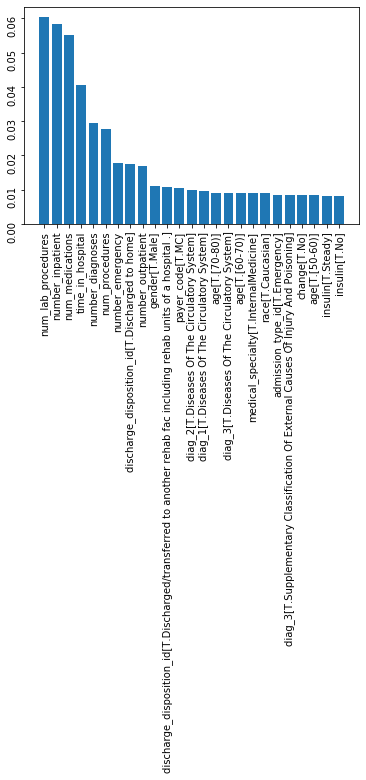

In [44]:
plt.bar(df.feature, df.coefficient)
plt.xticks(rotation='vertical');
plt.yticks(rotation='vertical');

AttributeError: module 'matplotlib.pyplot' has no attribute 'invert_yaxis'

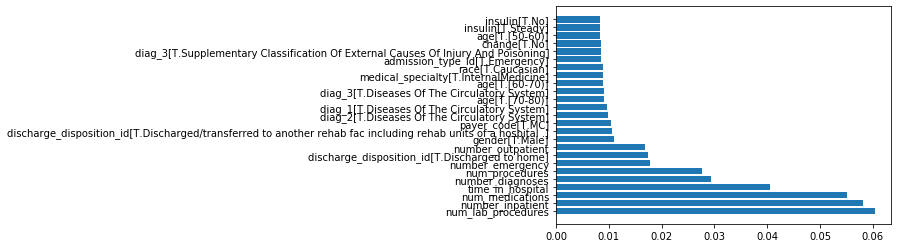

In [45]:
plt.barh(df.feature, df.coefficient)
plt.invert_yaxis()

#### Plotting the correlation between readmission and the top 25 predictive features:

In [46]:
list(df.feature.unique())

['num_lab_procedures',
 'number_inpatient',
 'num_medications',
 'time_in_hospital',
 'number_diagnoses',
 'num_procedures',
 'number_emergency',
 'discharge_disposition_id[T.Discharged to home]',
 'number_outpatient',
 'gender[T.Male]',
 'discharge_disposition_id[T.Discharged/transferred to another rehab fac including rehab units of a hospital .]',
 'payer_code[T.MC]',
 'diag_2[T.Diseases Of The Circulatory System]',
 'diag_1[T.Diseases Of The Circulatory System]',
 'age[T.[70-80)]',
 'diag_3[T.Diseases Of The Circulatory System]',
 'age[T.[60-70)]',
 'medical_specialty[T.InternalMedicine]',
 'race[T.Caucasian]',
 'admission_type_id[T.Emergency]',
 'diag_3[T.Supplementary Classification Of External Causes Of Injury And Poisoning]',
 'change[T.No]',
 'age[T.[50-60)]',
 'insulin[T.Steady]',
 'insulin[T.No]']

In [47]:
sub_x = x.copy()[list(df.feature.unique())]

In [48]:
sub_x['y'] = y

In [49]:
sub_x.head()

,num_lab_procedures,number_inpatient,num_medications,time_in_hospital,number_diagnoses,num_procedures,number_emergency,discharge_disposition_id[T.Discharged to home],number_outpatient,gender[T.Male],...,age[T.[60-70)],medical_specialty[T.InternalMedicine],race[T.Caucasian],admission_type_id[T.Emergency],diag_3[T.Supplementary Classification Of External Causes Of Injury And Poisoning],change[T.No],age[T.[50-60)],insulin[T.Steady],insulin[T.No],y
0,41.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NO
1,59.0,0.0,18.0,3.0,9.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NO
2,11.0,1.0,13.0,2.0,6.0,5.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NO
3,44.0,0.0,16.0,2.0,7.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NO
4,51.0,0.0,8.0,1.0,5.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,NO


In [50]:
sub_x.y = sub_x.y.replace('NO',0)
sub_x.y = sub_x.y.replace('<30',1)

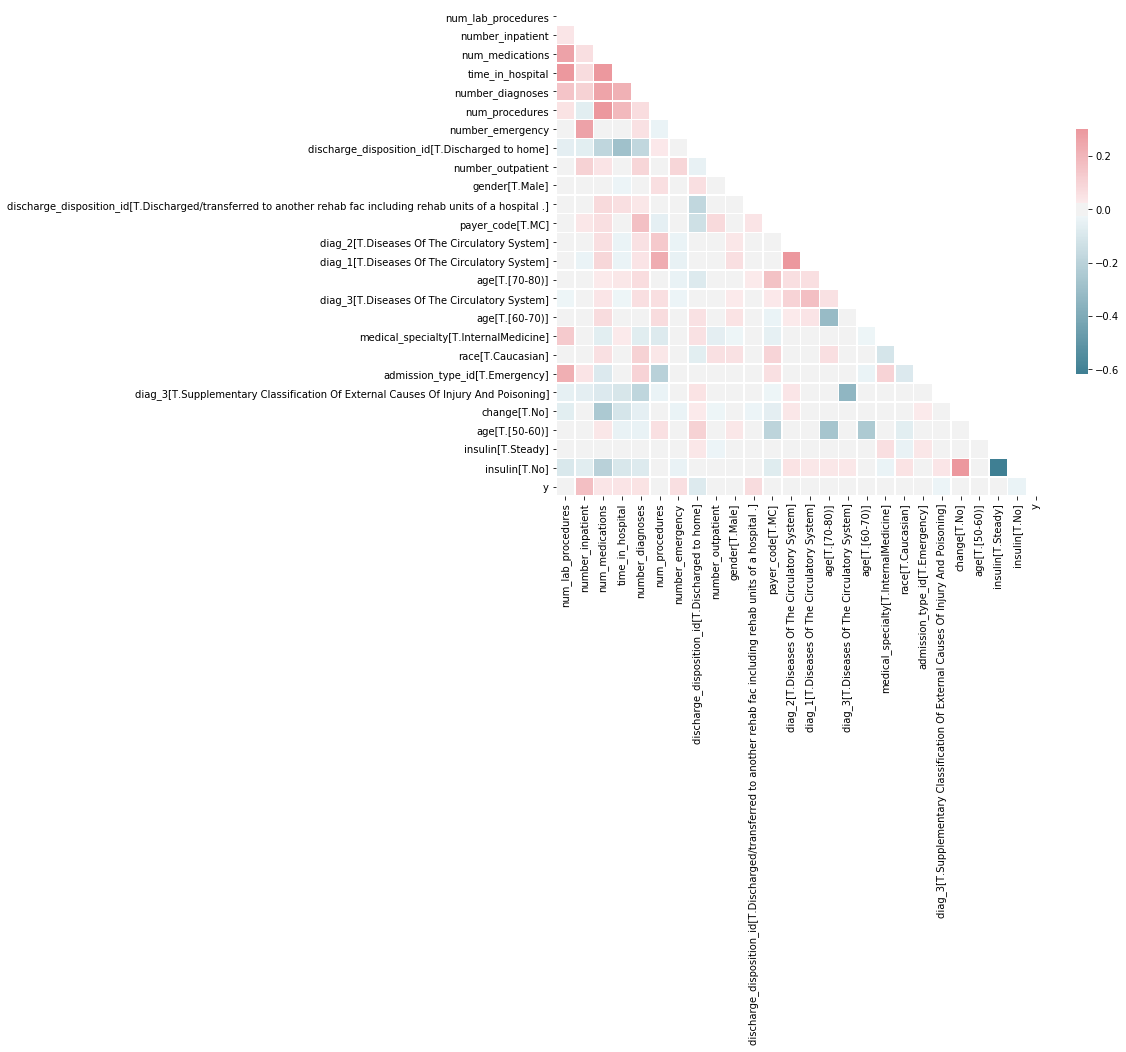

In [51]:
# sns.pairplot(sub_x)

# Compute the correlation matrix
corr = sub_x.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [52]:
sub_x = sub_x.drop(['y'], axis=1)

In [53]:
sub_x.shape

(100114, 25)

#### My top 25 features keep the recall at .60, .61 - slightly higher with re-tweaking hyperparameters

In [54]:
x_train, x_test, y_train, y_test = train_test_split(sub_x, y, test_size=0.25, random_state=42, stratify=y)

In [55]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

In [56]:
x_train.shape

(75085, 25)

In [57]:
randomforest = RandomForestClassifier(n_estimators=300, min_samples_split=70)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.618
              precision    recall  f1-score   support

         <30       0.17      0.62      0.27      2839
          NO       0.93      0.62      0.74     22190

    accuracy                           0.62     25029
   macro avg       0.55      0.62      0.50     25029
weighted avg       0.84      0.62      0.69     25029

[[ 1754  1085]
 [ 8475 13715]]


In [58]:
# pickle model for predictor app
with open('randomforest.pkl', 'wb') as picklefile:
    pickle.dump(randomforest, picklefile)

Text(68.09375, 0.5, 'True')

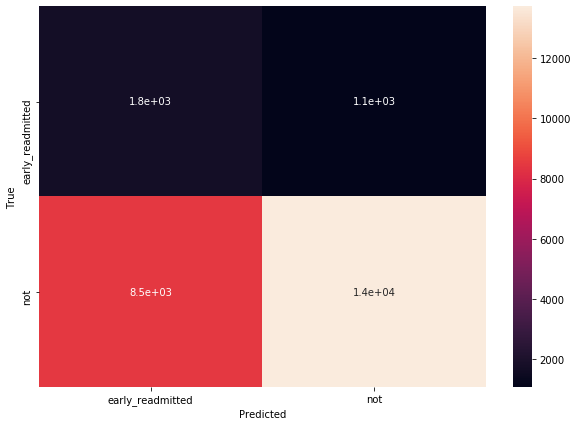

In [59]:
array = metrics.confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = ['early_readmitted', 'not'],
                  columns = ['early_readmitted', 'not'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [60]:
from sklearn.metrics import precision_recall_curve

In [61]:
y_test_num = y_test.copy()
y_test_num = y_test_num.replace('NO', 0)
y_test_num = y_test_num.replace('<30', 1)

Text(0.5, 1.0, 'Precision Recall Curve')

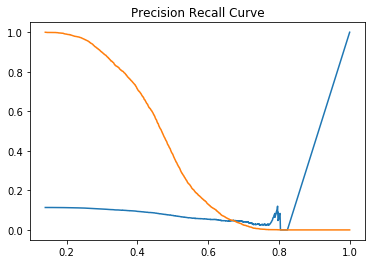

In [62]:
model = randomforest

y_score = model.predict_proba(x_test)[:, 1]
p, r, t = precision_recall_curve(y_test_num, y_score)

# adding last threshold of '1' to threshold list
t = np.vstack([t.reshape([-1, 1]), 1])

plt.plot(t, p)
plt.plot(t, r)
plt.title('Precision Recall Curve')
# yellow = recall
# blue = precision